In [1]:
%matplotlib inline

In [2]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import cv2

HAND_IMAGE = 'resources/hand_real.png'


In [3]:
# Diplay OpenCV images in a jupyter cell
def imshow(img, title=''):
    if len(img.shape) == 3:
        img = img[:,:,::-1]
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
# Reload a clean hand image
def reload_hand():
    global hand_img
    hand_img = cv2.imread(HAND_IMAGE)

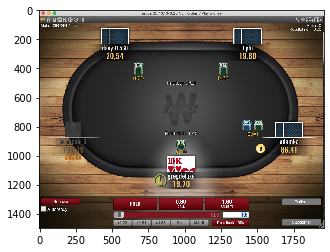

In [6]:
filename = 'resources/screenshot_table.png'
img = cv2.imread(filename)
imshow(img)

In [ ]:
img.shape

### We crop the hand player

In [ ]:
y = 800
y_ = 1250
x = 600
x_ = 1300
hand_img = img[y:y_, x:x_]
# cv2.imwrite(HAND_IMAGE,hand_img)
imshow(hand_img)

### Applying contour detection

In [ ]:
def getCards(im, numcards=4):
  gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  blur = cv2.GaussianBlur(gray,(1,1),1000)
  flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY) 
       
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards]  

  for card in contours:
    peri = cv2.arcLength(card,True)
    approx = rectify(cv2.approxPolyDP(card,0.02*peri,True))

    # box = np.int0(approx)
    # cv2.drawContours(im,[box],0,(255,255,0),6)
    # imx = cv2.resize(im,(1000,600))
    # cv2.imshow('a',imx)      
    
    h = np.array([ [0,0],[449,0],[449,449],[0,449] ],np.float32)

    transform = cv2.getPerspectiveTransform(approx,h)
    warp = cv2.warpPerspective(im,transform,(450,450))
    
yield warp

In [43]:
# Gaussian blurr
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [50]:
# Trial with Canny filter
edged = cv2.Canny(blurred, 30, 200)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [45]:
gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(gray, 30, 200) 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 


# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
# contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#     cv2.CHAIN_APPROX_SIMPLE)
# contours = sorted(contours, key=cv2.contourArea,reverse=True)


In [51]:
rectangles = []
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) == 4:
        rectangles.append(c)
    

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

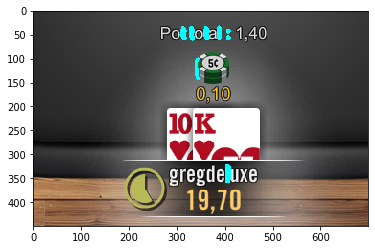

In [52]:
cv2.drawContours(hand_img, rectangles, -1,(255,255,0),6)
imshow(hand_img)

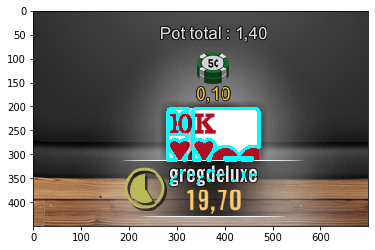

In [15]:
reload_hand()
gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(hand_img, cnts, -1,(255,255,0),6)
imshow(hand_img)

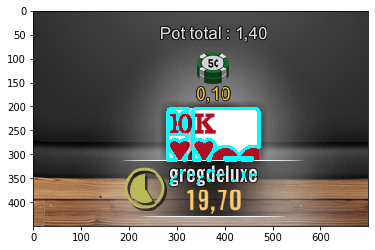

In [14]:
reload_hand()
gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(hand_img, cnts, -1,(255,255,0),6)
imshow(hand_img)

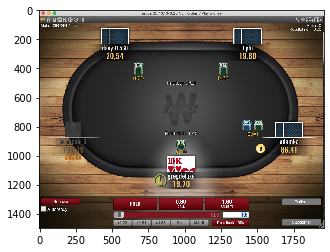

In [18]:
imshow(img)

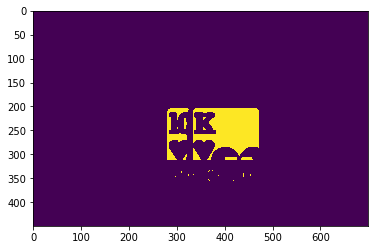

In [74]:
imshow(thresh)